# SONM active deal analyzer

## This notebook is to analyze active deals on the SONM platform in real-time.

### Import necessary libraries

In [290]:
import pandas as pd
import numpy as np

In [291]:
import seaborn as sns

### ipython magic to plot in a notebook

In [292]:
%matplotlib inline

### SONM's DWH spits out API information of active deals.  Using Jupyter's magic to run BASH command to save the API data to livedeal.txt

In [293]:
!curl -s https://dwh.livenet.sonm.com:15022/DWHServer/GetDeals/ -d '{"status":1}' > livedeal.txt

### Open the saved text in Jupyter

In [294]:
f = open('livedeal.txt','r')

### Convert opened file to Pandas dataframe.

In [295]:
k = f.readlines()

In [296]:
r = k[0].split(',')

In [297]:
headposition = []
i = 0
for item in r:
    if 'deal' in item:

        headposition.append(i)
    i = i+1

In [298]:
testlist = []
for i in range(len(headposition)):
    if headposition[i]>0:
        #print(headposition[i-1], headposition[i])
        #print(r[headposition[i-1] : headposition[i]])
        testlist.append(r[headposition[i-1] : headposition[i]])

In [299]:
df = pd.DataFrame(testlist)

In [300]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,"{""deals"":[{""deal"":{""id"":""15392""","""benchmarks"":{""values"":[2169",2111,32,64000000,150000000,1000000,1000000,0,0,...,"""status"":1","""blockedBalance"":""3700188223743732""","""totalPayout"":""0""","""lastBillTS"":""2018-10-02T22:11:57Z""}","""netflags"":2","""askIdentityLevel"":1","""bidIdentityLevel"":1","""consumerCertificates"":""W10=""}",None,None
1,"{""deal"":{""id"":""15391""","""benchmarks"":{""values"":[2169",2111,32,64000000,150000000,1000000,1000000,0,0,...,"""status"":1","""blockedBalance"":""3703268864832071""","""totalPayout"":""0""","""lastBillTS"":""2018-10-02T22:11:06Z""}","""netflags"":2","""askIdentityLevel"":1","""bidIdentityLevel"":1","""consumerCertificates"":""W10=""}",None,None
2,"{""deal"":{""id"":""15358""","""benchmarks"":{""values"":[10365",1846,12,64000000,150000000,1000000,1000000,0,0,...,"""status"":1","""blockedBalance"":""129105922383541442""","""totalPayout"":""129080127711712167""","""lastBillTS"":""2018-10-02T22:10:54Z""}","""netflags"":2","""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W10=""","""consumerCertificates"":""W10=""}",None
3,"{""deal"":{""id"":""15357""","""benchmarks"":{""values"":[2318",1507,4,64000000,150000000,1000001,1000000,0,0,...,"""status"":1","""blockedBalance"":""18812274289725640""","""totalPayout"":""18963920080500939""","""lastBillTS"":""2018-10-02T22:10:15Z""}","""netflags"":2","""askIdentityLevel"":1","""bidIdentityLevel"":1","""consumerCertificates"":""W10=""}",None,None
4,"{""deal"":{""id"":""15356""","""benchmarks"":{""values"":[1260",1077,2,64000000,150000000,1000000,1000000,0,0,...,"""status"":1","""blockedBalance"":""7493296710190939""","""totalPayout"":""7528545809274256""","""lastBillTS"":""2018-10-02T22:09:57Z""}","""netflags"":2","""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W10=""","""consumerCertificates"":""W10=""}",None


## Data Cleaning

### The 14 column contains consumer ID.  First clean this colum.

In [301]:
df[15]

0     "consumerID":"0x4C5BAf6Fa57AA4b37DB3dAcd5eAf5A...
1     "consumerID":"0x4C5BAf6Fa57AA4b37DB3dAcd5eAf5A...
2     "consumerID":"0x4C5BAf6Fa57AA4b37DB3dAcd5eAf5A...
3     "consumerID":"0x4C5BAf6Fa57AA4b37DB3dAcd5eAf5A...
4     "consumerID":"0x4C5BAf6Fa57AA4b37DB3dAcd5eAf5A...
5     "consumerID":"0x417c92FbD944b125A578848DE44a4F...
6     "consumerID":"0x5D2c0CF8ec8C2d10Cda338f2d59893...
7     "consumerID":"0x18CB84498d67635F14BA20A7A5DD9F...
8     "consumerID":"0x4C5BAf6Fa57AA4b37DB3dAcd5eAf5A...
9     "consumerID":"0x417c92FbD944b125A578848DE44a4F...
10    "consumerID":"0x4C5BAf6Fa57AA4b37DB3dAcd5eAf5A...
11    "consumerID":"0x4C5BAf6Fa57AA4b37DB3dAcd5eAf5A...
12    "consumerID":"0xeFe1976D528FdeAC56E09115462dDe...
13    "consumerID":"0x4C5BAf6Fa57AA4b37DB3dAcd5eAf5A...
14    "consumerID":"0x417c92FbD944b125A578848DE44a4F...
15    "consumerID":"0x4C5BAf6Fa57AA4b37DB3dAcd5eAf5A...
16    "consumerID":"0x4C5BAf6Fa57AA4b37DB3dAcd5eAf5A...
17    "consumerID":"0x417c92FbD944b125A578848DE4

### Make a little funtion to trim unnecessary charactors

In [302]:
def Supplier_ID_conversion(content):
    return content[14:-1]

###  And applyt to pandas data frame.  New column called consumer_ID is generated.

In [303]:
df['consumer_ID'] = df[15].apply(Supplier_ID_conversion)

In [304]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,consumer_ID
0,"{""deals"":[{""deal"":{""id"":""15392""","""benchmarks"":{""values"":[2169",2111,32,64000000,150000000,1000000,1000000,0,0,...,"""blockedBalance"":""3700188223743732""","""totalPayout"":""0""","""lastBillTS"":""2018-10-02T22:11:57Z""}","""netflags"":2","""askIdentityLevel"":1","""bidIdentityLevel"":1","""consumerCertificates"":""W10=""}",None,None,0x4C5BAf6Fa57AA4b37DB3dAcd5eAf5A220Db638c7
1,"{""deal"":{""id"":""15391""","""benchmarks"":{""values"":[2169",2111,32,64000000,150000000,1000000,1000000,0,0,...,"""blockedBalance"":""3703268864832071""","""totalPayout"":""0""","""lastBillTS"":""2018-10-02T22:11:06Z""}","""netflags"":2","""askIdentityLevel"":1","""bidIdentityLevel"":1","""consumerCertificates"":""W10=""}",None,None,0x4C5BAf6Fa57AA4b37DB3dAcd5eAf5A220Db638c7
2,"{""deal"":{""id"":""15358""","""benchmarks"":{""values"":[10365",1846,12,64000000,150000000,1000000,1000000,0,0,...,"""blockedBalance"":""129105922383541442""","""totalPayout"":""129080127711712167""","""lastBillTS"":""2018-10-02T22:10:54Z""}","""netflags"":2","""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W10=""","""consumerCertificates"":""W10=""}",None,0x4C5BAf6Fa57AA4b37DB3dAcd5eAf5A220Db638c7
3,"{""deal"":{""id"":""15357""","""benchmarks"":{""values"":[2318",1507,4,64000000,150000000,1000001,1000000,0,0,...,"""blockedBalance"":""18812274289725640""","""totalPayout"":""18963920080500939""","""lastBillTS"":""2018-10-02T22:10:15Z""}","""netflags"":2","""askIdentityLevel"":1","""bidIdentityLevel"":1","""consumerCertificates"":""W10=""}",None,None,0x4C5BAf6Fa57AA4b37DB3dAcd5eAf5A220Db638c7
4,"{""deal"":{""id"":""15356""","""benchmarks"":{""values"":[1260",1077,2,64000000,150000000,1000000,1000000,0,0,...,"""blockedBalance"":""7493296710190939""","""totalPayout"":""7528545809274256""","""lastBillTS"":""2018-10-02T22:09:57Z""}","""netflags"":2","""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W10=""","""consumerCertificates"":""W10=""}",None,0x4C5BAf6Fa57AA4b37DB3dAcd5eAf5A220Db638c7


## supplier

###  Same trick for the supplier ID.  The 13 column contains supplier ID information.  Clean with the same function.

In [305]:
df[14]

0     "supplierID":"0xdEa8d435E978e73F8C1e4850a871Bf...
1     "supplierID":"0xdEa8d435E978e73F8C1e4850a871Bf...
2     "supplierID":"0x0E953f4fBdb806B47DC9a9a2546a22...
3     "supplierID":"0x491028A2510F1f9f10650272f780f2...
4     "supplierID":"0xF99B6FeCB09521A0770de019DDCa4a...
5     "supplierID":"0xf6db5268Dc72DfDC2a21AC9895d64f...
6     "supplierID":"0xEd07629D8B32bdAdedfAB959236B68...
7     "supplierID":"0xaE7DB91DeC00E3Be062C7dC3328859...
8     "supplierID":"0x491028A2510F1f9f10650272f780f2...
9     "supplierID":"0x730F19B7FA079EBfDc7360066ec593...
10    "supplierID":"0xdEa8d435E978e73F8C1e4850a871Bf...
11    "supplierID":"0xdEa8d435E978e73F8C1e4850a871Bf...
12    "supplierID":"0x0F34D8A17481345Da3f20989De43b1...
13    "supplierID":"0x491028A2510F1f9f10650272f780f2...
14    "supplierID":"0xdEa8d435E978e73F8C1e4850a871Bf...
15    "supplierID":"0x39A0d12A26F6B79D7c1DcE36c15081...
16    "supplierID":"0x190da597Ee157D24f71842DB63A2A9...
17    "supplierID":"0x0E953f4fBdb806B47DC9a9a254

In [306]:
df['supplier_ID'] = df[14].apply(Supplier_ID_conversion)

### Price

### Price value is shown as USD/s, so conver it to USD/h

In [307]:
unit = 10.0**18.0

4830442500000/unit * 60 *60

In [308]:
def Price_conversion(content):
    if 'price' in content:
        return float(content[9:-1])/unit * 60 *60
    if 'duration' in content:
        return float(content[11:-1])/unit * 60 * 60

In [309]:
df[19]

0        "price":"57203551970"
1        "price":"57203551970"
2      "price":"1990555014480"
3       "price":"292444134350"
4       "price":"115905383720"
5      "price":"4579092000000"
6     "price":"73346745000000"
7       "price":"133333333333"
8        "price":"61561290290"
9      "price":"5173666000000"
10       "price":"56771098980"
11       "price":"56771098980"
12     "price":"2777777777777"
13      "price":"177279990660"
14    "price":"15977304000000"
15      "price":"351144693840"
16      "price":"118310429420"
17    "price":"10147913500000"
18       "price":"57952691860"
19      "price":"115905383720"
20      "price":"177465644130"
21    "price":"47067705833333"
22    "price":"59999903055555"
23     "price":"1339984166666"
24    "price":"48984275833333"
25    "price":"36403469722222"
26     "price":"4282551000000"
27      "price":"231056421400"
28                 "price":"0"
29     "price":"4484142000000"
                ...           
69     "price":"4394227500000"
70      

In [310]:
df['price_USD/h'] = df[19].apply(Price_conversion)

###  ETH has rate

### The 10 column contains Ethash value.  Clean and convert to Mh/s.

In [311]:
df[10]

0             0
1             0
2             0
3             0
4             0
5      21019000
6     292673000
7             0
8             0
9      23887000
10            0
11            0
12            0
13            0
14     72155000
15            0
16            0
17     44702000
18            0
19            0
20            0
21    194346000
22    240009000
23            0
24    199645000
25    150969000
26     19778000
27            0
28            0
29     19934000
        ...    
69     19806000
70            0
71            0
72            0
73            0
74            0
75            0
76            0
77            0
78            0
79     22576000
80    186366000
81            0
82            0
83            0
84            0
85            0
86            0
87            0
88    145672000
89            0
90            0
91            0
92            0
93     76731000
94     64992000
95            0
96            0
97            0
98            0
Name: 10, Length: 99, dt

In [312]:
float(df[10][0])/1000000

0.0

In [313]:
def Ethash_conversion(content):
    return float(content)/1000000

In [314]:
Ethash_conversion(df[10][0])

0.0

In [315]:
df['Ethash'] = df[10].apply(Ethash_conversion)

In [316]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,consumer_ID,supplier_ID,price_USD/h,Ethash
0,"{""deals"":[{""deal"":{""id"":""15392""","""benchmarks"":{""values"":[2169",2111,32,64000000,150000000,1000000,1000000,0,0,...,"""netflags"":2","""askIdentityLevel"":1","""bidIdentityLevel"":1","""consumerCertificates"":""W10=""}",None,None,0x4C5BAf6Fa57AA4b37DB3dAcd5eAf5A220Db638c7,0xdEa8d435E978e73F8C1e4850a871BfE8E995Ded0,0.000206,0.0
1,"{""deal"":{""id"":""15391""","""benchmarks"":{""values"":[2169",2111,32,64000000,150000000,1000000,1000000,0,0,...,"""netflags"":2","""askIdentityLevel"":1","""bidIdentityLevel"":1","""consumerCertificates"":""W10=""}",None,None,0x4C5BAf6Fa57AA4b37DB3dAcd5eAf5A220Db638c7,0xdEa8d435E978e73F8C1e4850a871BfE8E995Ded0,0.000206,0.0
2,"{""deal"":{""id"":""15358""","""benchmarks"":{""values"":[10365",1846,12,64000000,150000000,1000000,1000000,0,0,...,"""netflags"":2","""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W10=""","""consumerCertificates"":""W10=""}",None,0x4C5BAf6Fa57AA4b37DB3dAcd5eAf5A220Db638c7,0x0E953f4fBdb806B47DC9a9a2546a22eA967Fe8a1,0.007166,0.0
3,"{""deal"":{""id"":""15357""","""benchmarks"":{""values"":[2318",1507,4,64000000,150000000,1000001,1000000,0,0,...,"""netflags"":2","""askIdentityLevel"":1","""bidIdentityLevel"":1","""consumerCertificates"":""W10=""}",None,None,0x4C5BAf6Fa57AA4b37DB3dAcd5eAf5A220Db638c7,0x491028A2510F1f9f10650272f780f2da1302bd73,0.001053,0.0
4,"{""deal"":{""id"":""15356""","""benchmarks"":{""values"":[1260",1077,2,64000000,150000000,1000000,1000000,0,0,...,"""netflags"":2","""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W10=""","""consumerCertificates"":""W10=""}",None,0x4C5BAf6Fa57AA4b37DB3dAcd5eAf5A220Db638c7,0xF99B6FeCB09521A0770de019DDCa4a82362Aca78,0.000417,0.0


##  master ID

In [317]:
df[16]

0     "masterID":"0x94CE08B2018Ede760757eb2892591e91...
1     "masterID":"0x94CE08B2018Ede760757eb2892591e91...
2     "masterID":"0xb58754AC9839d9cF5D4920E440a61988...
3     "masterID":"0x517648Ec2E592969Ec344642034F079c...
4     "masterID":"0x0158400292660B759E1e0E8CDEe5b62A...
5     "masterID":"0x1e63aa3331f990D1200191Bb38602F4c...
6     "masterID":"0x1270C99f089Cbf8bF82b926579dE10e0...
7     "masterID":"0xf5c532D26cA0394822C1052989bfD36D...
8     "masterID":"0x517648Ec2E592969Ec344642034F079c...
9     "masterID":"0x29D518e8A3EEA4f92f6dB0FC8F52d8AA...
10    "masterID":"0x94CE08B2018Ede760757eb2892591e91...
11    "masterID":"0x94CE08B2018Ede760757eb2892591e91...
12    "masterID":"0x7f6110d082AB57432d773B338EFE7a16...
13    "masterID":"0x517648Ec2E592969Ec344642034F079c...
14    "masterID":"0x94CE08B2018Ede760757eb2892591e91...
15    "masterID":"0x7f6110d082AB57432d773B338EFE7a16...
16    "masterID":"0x996f45E99a208B2B529bf3fd01602Ef0...
17    "masterID":"0xb58754AC9839d9cF5D4920E440a6

In [318]:
def Master_ID_conversion(content):
    return content[12:-1]

In [319]:
df['master_ID'] =  df[16].apply(Master_ID_conversion)

# deal ID

In [413]:
def convert_deal_ID(content):
    return int(content[content[:-1].rfind('"')+1:-1])

In [414]:
df['deal_ID'] = df[0].apply(convert_deal_ID)

# Run statistics for suppliers

In [415]:
df.groupby('supplier_ID').describe()['Ethash']

,count,mean,std,min,25%,50%,75%,max
supplier_ID,,,,,,,,
0x01220eF468921C9f601F4f6361b89662442511C6,2.0,0.000000,0.000000,0.000,0.00000,0.0000,0.00000,0.000
0x0E953f4fBdb806B47DC9a9a2546a22eA967Fe8a1,2.0,22.351000,31.609087,0.000,11.17550,22.3510,33.52650,44.702
0x0F34D8A17481345Da3f20989De43b1081De4C377,1.0,0.000000,NaN,0.000,0.00000,0.0000,0.00000,0.000
0x0b6EB1366be92128Fc2386E9ABeCdE0E76314E96,2.0,97.173000,137.423374,0.000,48.58650,97.1730,145.75950,194.346
0x0dDfC4383f72f3d9B3d80949358405f6A268aA4d,1.0,195.750000,NaN,195.750,195.75000,195.7500,195.75000,195.750
0x0f46AC8B9a1E604915D77de1405931d360cd0F3A,2.0,0.000000,0.000000,0.000,0.00000,0.0000,0.00000,0.000
0x10B3Fe7B225b9fF0294CAa76d5d9F8514Cd3d7B9,3.0,62.122000,107.598460,0.000,0.00000,0.0000,93.18300,186.366
0x190da597Ee157D24f71842DB63A2A910DA2338c1,2.0,0.000000,0.000000,0.000,0.00000,0.0000,0.00000,0.000
0x1A46613006bCACCA13b27B3b317edA65D726ef6b,3.0,6.602000,11.434999,0.000,0.00000,0.0000,9.90300,19.806


In [416]:
df10 = df.groupby('supplier_ID').describe()['Ethash']

In [417]:
df10.to_csv('eth.csv')

In [418]:
df11 = pd.read_csv('eth.csv')

In [419]:
df11['total_Ethash']= df11['count']*df11['mean']

In [420]:
df11[['supplier_ID','total_Ethash','count']]

,supplier_ID,total_Ethash,count
0,0x01220eF468921C9f601F4f6361b89662442511C6,0.000,2.0
1,0x0E953f4fBdb806B47DC9a9a2546a22eA967Fe8a1,44.702,2.0
2,0x0F34D8A17481345Da3f20989De43b1081De4C377,0.000,1.0
3,0x0b6EB1366be92128Fc2386E9ABeCdE0E76314E96,194.346,2.0
4,0x0dDfC4383f72f3d9B3d80949358405f6A268aA4d,195.750,1.0
5,0x0f46AC8B9a1E604915D77de1405931d360cd0F3A,0.000,2.0
6,0x10B3Fe7B225b9fF0294CAa76d5d9F8514Cd3d7B9,186.366,3.0
7,0x190da597Ee157D24f71842DB63A2A910DA2338c1,0.000,2.0
8,0x1A46613006bCACCA13b27B3b317edA65D726ef6b,19.806,3.0
9,0x1E575FB7dD8b28CEcAD9065A7aFD1aC6c2fBA797,23.014,2.0


In [421]:
df11[['supplier_ID','total_Ethash','count']].sort_values('total_Ethash', ascending = False)

,supplier_ID,total_Ethash,count
40,0xEd07629D8B32bdAdedfAB959236B684AbD3e81FC,292.673,1.0
35,0x9C89fFA068b17a07D53dC97B0AA6A7069C69d966,244.352,1.0
10,0x1a5d1841078be8d8f2b54D4F3264438a69e94C94,240.009,2.0
11,0x26200241593722FA17DE5722Ed66d8830dc58C6D,219.579,3.0
4,0x0dDfC4383f72f3d9B3d80949358405f6A268aA4d,195.750,1.0
3,0x0b6EB1366be92128Fc2386E9ABeCdE0E76314E96,194.346,2.0
22,0x672Ee945a55327328472B1a02437293945157f4C,186.411,3.0
6,0x10B3Fe7B225b9fF0294CAa76d5d9F8514Cd3d7B9,186.366,3.0
47,0xd8B606a3D19C53E6Eea84ca5738D7D7d2c0eeb5f,186.283,3.0
21,0x62F5A3B4E867a9AB981201EbFA9A6FEA8dc22007,186.198,2.0


In [422]:
df12 = df11[['supplier_ID','total_Ethash','count']].sort_values('total_Ethash', ascending = False)

In [423]:
df12.to_csv('ethash.csv', index = False)

In [424]:
df13 = pd.read_csv('ethash.csv')

In [425]:
df13

,supplier_ID,total_Ethash,count
0,0xEd07629D8B32bdAdedfAB959236B684AbD3e81FC,292.673,1.0
1,0x9C89fFA068b17a07D53dC97B0AA6A7069C69d966,244.352,1.0
2,0x1a5d1841078be8d8f2b54D4F3264438a69e94C94,240.009,2.0
3,0x26200241593722FA17DE5722Ed66d8830dc58C6D,219.579,3.0
4,0x0dDfC4383f72f3d9B3d80949358405f6A268aA4d,195.750,1.0
5,0x0b6EB1366be92128Fc2386E9ABeCdE0E76314E96,194.346,2.0
6,0x672Ee945a55327328472B1a02437293945157f4C,186.411,3.0
7,0x10B3Fe7B225b9fF0294CAa76d5d9F8514Cd3d7B9,186.366,3.0
8,0xd8B606a3D19C53E6Eea84ca5738D7D7d2c0eeb5f,186.283,3.0
9,0x62F5A3B4E867a9AB981201EbFA9A6FEA8dc22007,186.198,2.0


In [426]:
df13['total_Ethash'].sum()

3730.7919999997998

In [427]:
print('Real-time total Ethash rate of the entire SONM platform is '+ str(df13['total_Ethash'].sum()) +' Mh/s')

Real-time total Ethash rate of the entire SONM platform is 3730.792 Mh/s


## supplier's revenue

In [428]:
df13['supplier_ID'][0]

'0xEd07629D8B32bdAdedfAB959236B684AbD3e81FC'

In [429]:
df[df.supplier_ID == df13['supplier_ID'][0]]['price_USD/h'].sum()

0.26404828200000002

In [430]:
def total_revenue(address):
    return df[df.supplier_ID == address]['price_USD/h'].sum()

In [431]:
total_revenue(df13['supplier_ID'][0])

0.26404828200000002

In [432]:
df13['total_revenue_USD/h'] = df13['supplier_ID'].apply(total_revenue)

In [433]:
df13.dtypes

supplier_ID             object
total_Ethash           float64
count                  float64
total_revenue_USD/h    float64
dtype: object

In [434]:
df13['total_revenue_USD/d'] = df13['total_revenue_USD/h'] *24

In [435]:
df13['revenue_USD/d'] = df13['total_revenue_USD/d'].map('${:,.2f}'.format)

In [436]:
df13.head()

,supplier_ID,total_Ethash,count,total_revenue_USD/h,total_revenue_USD/d,revenue_USD/d
0,0xEd07629D8B32bdAdedfAB959236B684AbD3e81FC,292.673,1.0,0.264048,6.337159,$6.34
1,0x9C89fFA068b17a07D53dC97B0AA6A7069C69d966,244.352,1.0,0.214912,5.157893,$5.16
2,0x1a5d1841078be8d8f2b54D4F3264438a69e94C94,240.009,2.0,0.216831,5.203956,$5.20
3,0x26200241593722FA17DE5722Ed66d8830dc58C6D,219.579,3.0,0.192712,4.625078,$4.63
4,0x0dDfC4383f72f3d9B3d80949358405f6A268aA4d,195.750,1.0,0.216000,5.184000,$5.18


In [437]:
sns.set()

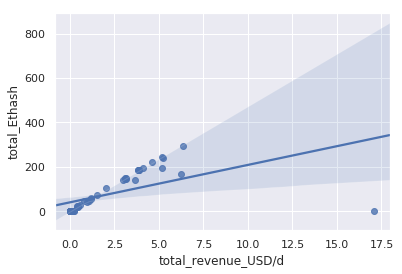

In [438]:
sns.regplot(y="total_Ethash", x="total_revenue_USD/d", data=df13)

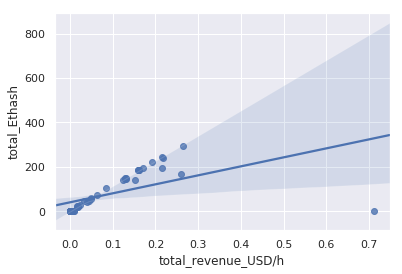

In [439]:
sns.regplot(y="total_Ethash", x="total_revenue_USD/h", data=df13)

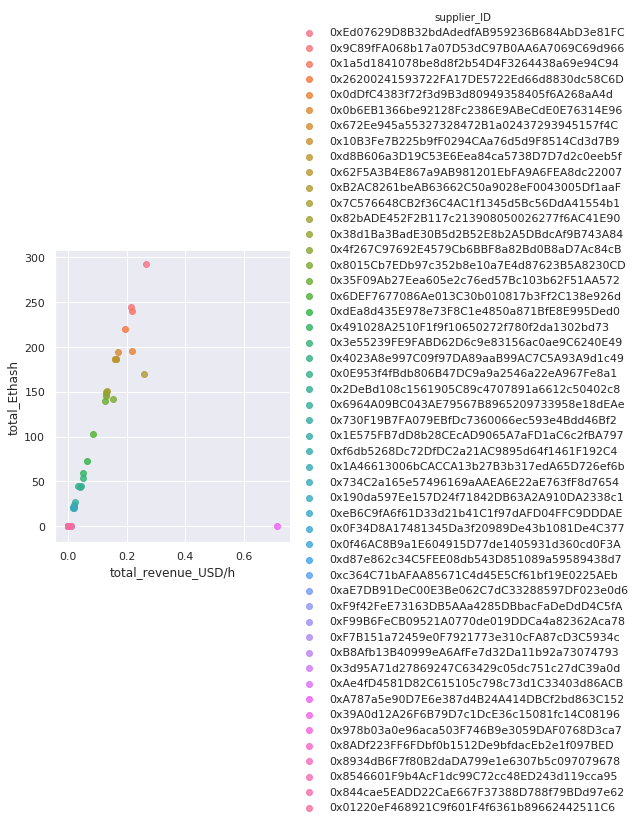

In [440]:
sns.lmplot( y="total_Ethash", x="total_revenue_USD/h", data=df13, fit_reg=False, hue='supplier_ID', legend=True)

In [441]:
df13[['supplier_ID','total_Ethash','count','revenue_USD/d']]

,supplier_ID,total_Ethash,count,revenue_USD/d
0,0xEd07629D8B32bdAdedfAB959236B684AbD3e81FC,292.673,1.0,$6.34
1,0x9C89fFA068b17a07D53dC97B0AA6A7069C69d966,244.352,1.0,$5.16
2,0x1a5d1841078be8d8f2b54D4F3264438a69e94C94,240.009,2.0,$5.20
3,0x26200241593722FA17DE5722Ed66d8830dc58C6D,219.579,3.0,$4.63
4,0x0dDfC4383f72f3d9B3d80949358405f6A268aA4d,195.750,1.0,$5.18
5,0x0b6EB1366be92128Fc2386E9ABeCdE0E76314E96,194.346,2.0,$4.08
6,0x672Ee945a55327328472B1a02437293945157f4C,186.411,3.0,$3.82
7,0x10B3Fe7B225b9fF0294CAa76d5d9F8514Cd3d7B9,186.366,3.0,$3.90
8,0xd8B606a3D19C53E6Eea84ca5738D7D7d2c0eeb5f,186.283,3.0,$3.80
9,0x62F5A3B4E867a9AB981201EbFA9A6FEA8dc22007,186.198,2.0,$3.87


In [442]:
df13['total_revenue_USD/d'].sum()

100.84603906095046

In [443]:
df13['total_revenue_USD/d'].sum()

100.84603906095046

In [444]:
"{:.2f}".format(df13['total_revenue_USD/d'].sum())

'100.85'

In [445]:
print('At this moment, total ' + str("{:.2f}".format(df13['total_revenue_USD/d'].sum())) + ' USD/day is spent on the entire SONM platform.')

At this moment, total 100.85 USD/day is spent on the entire SONM platform.


# Run the same statistics for master_ID

In [446]:
df.groupby('master_ID').describe()['Ethash']

,count,mean,std,min,25%,50%,75%,max
master_ID,,,,,,,,
0x0158400292660B759E1e0E8CDEe5b62AAf2c58e1,1.0,0.000000,NaN,0.000,0.00000,0.0000,0.00000,0.000
0x0a2f8E337b4b7A3cd01162025C69a80E2aE7E4B3,2.0,0.000000,0.000000,0.000,0.00000,0.0000,0.00000,0.000
0x1270C99f089Cbf8bF82b926579dE10e05F93d2fb,4.0,164.445500,112.340528,22.576,115.73125,171.2665,219.98075,292.673
0x15a16a98d0F6Bf91859e240e4DA02171D31BBDCE,2.0,120.004500,169.711991,0.000,60.00225,120.0045,180.00675,240.009
0x1e63aa3331f990D1200191Bb38602F4c44e8900C,1.0,21.019000,NaN,21.019,21.01900,21.0190,21.01900,21.019
0x25158E6f8dD683d222E3785BA2294A319489084E,9.0,87.218556,90.678979,0.000,0.00000,102.6590,147.09400,244.352
0x257308430e87b7E45816Bda27DC76cbF739fCD30,2.0,22.473500,31.782328,0.000,11.23675,22.4735,33.71025,44.947
0x29D518e8A3EEA4f92f6dB0FC8F52d8AA4721561f,2.0,11.943500,16.890660,0.000,5.97175,11.9435,17.91525,23.887
0x35f286b2472A99Eb011ff349b2b33f6f497Ca693,2.0,70.861500,8.300727,64.992,67.92675,70.8615,73.79625,76.731


In [447]:
df20 = df.groupby('master_ID').describe()['Ethash']

In [448]:
df20.to_csv('mastereth.csv')

In [449]:
df21 = pd.read_csv('mastereth.csv')

In [450]:
df21['total_Ethash']= df21['count']*df21['mean']

In [451]:
df21.head()

,master_ID,count,mean,std,min,25%,50%,75%,max,total_Ethash
0,0x0158400292660B759E1e0E8CDEe5b62AAf2c58e1,1.0,0.0000,NaN,0.000,0.00000,0.0000,0.00000,0.000,0.000
1,0x0a2f8E337b4b7A3cd01162025C69a80E2aE7E4B3,2.0,0.0000,0.000000,0.000,0.00000,0.0000,0.00000,0.000,0.000
2,0x1270C99f089Cbf8bF82b926579dE10e05F93d2fb,4.0,164.4455,112.340528,22.576,115.73125,171.2665,219.98075,292.673,657.782
3,0x15a16a98d0F6Bf91859e240e4DA02171D31BBDCE,2.0,120.0045,169.711991,0.000,60.00225,120.0045,180.00675,240.009,240.009
4,0x1e63aa3331f990D1200191Bb38602F4c44e8900C,1.0,21.0190,NaN,21.019,21.01900,21.0190,21.01900,21.019,21.019


In [452]:
df21[['master_ID','total_Ethash','count']]

,master_ID,total_Ethash,count
0,0x0158400292660B759E1e0E8CDEe5b62AAf2c58e1,0.000,1.0
1,0x0a2f8E337b4b7A3cd01162025C69a80E2aE7E4B3,0.000,2.0
2,0x1270C99f089Cbf8bF82b926579dE10e05F93d2fb,657.782,4.0
3,0x15a16a98d0F6Bf91859e240e4DA02171D31BBDCE,240.009,2.0
4,0x1e63aa3331f990D1200191Bb38602F4c44e8900C,21.019,1.0
5,0x25158E6f8dD683d222E3785BA2294A319489084E,784.967,9.0
6,0x257308430e87b7E45816Bda27DC76cbF739fCD30,44.947,2.0
7,0x29D518e8A3EEA4f92f6dB0FC8F52d8AA4721561f,23.887,2.0
8,0x35f286b2472A99Eb011ff349b2b33f6f497Ca693,141.723,2.0
9,0x416Af57F633e292b25976573a460d7C3200feD34,745.258,11.0


In [453]:
df22 = df21[['master_ID','total_Ethash','count']].sort_values('total_Ethash', ascending = False)

In [454]:
df22.head()

,master_ID,total_Ethash,count
5,0x25158E6f8dD683d222E3785BA2294A319489084E,784.967,9.0
9,0x416Af57F633e292b25976573a460d7C3200feD34,745.258,11.0
2,0x1270C99f089Cbf8bF82b926579dE10e05F93d2fb,657.782,4.0
18,0x904720c59EAA497dD6ed04ea46E15a4C76C99f63,340.018,4.0
3,0x15a16a98d0F6Bf91859e240e4DA02171D31BBDCE,240.009,2.0


In [455]:
df22.to_csv('masterethash.csv', index = False)

In [456]:
df23 = pd.read_csv('masterethash.csv')

In [457]:
df23

,master_ID,total_Ethash,count
0,0x25158E6f8dD683d222E3785BA2294A319489084E,784.967,9.0
1,0x416Af57F633e292b25976573a460d7C3200feD34,745.258,11.0
2,0x1270C99f089Cbf8bF82b926579dE10e05F93d2fb,657.782,4.0
3,0x904720c59EAA497dD6ed04ea46E15a4C76C99f63,340.018,4.0
4,0x15a16a98d0F6Bf91859e240e4DA02171D31BBDCE,240.009,2.0
5,0xedB7Ae4B946Cf249349974A02e354B5FBC577798,219.579,3.0
6,0xb58754AC9839d9cF5D4920E440a61988BB00B4c5,194.433,4.0
7,0x35f286b2472A99Eb011ff349b2b33f6f497Ca693,141.723,2.0
8,0x517648Ec2E592969Ec344642034F079c52AfD025,102.477,11.0
9,0x94CE08B2018Ede760757eb2892591e9147033040,72.155,6.0


In [458]:
def total_master_revenue(address):
    return df[df.master_ID == address]['price_USD/h'].sum()

In [459]:
df23['total_revenue_USD/h'] = df23['master_ID'].apply(total_master_revenue)

In [460]:
df23['total_revenue_USD/d'] = df23['total_revenue_USD/h'] *24

In [461]:
df23['revenue_USD/d'] = df23['total_revenue_USD/d'].map('${:,.2f}'.format)

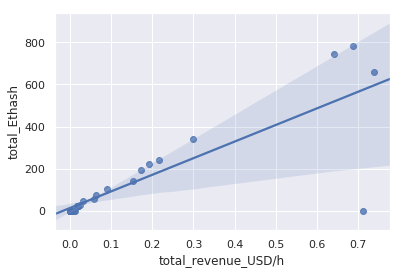

In [462]:
sns.regplot(y="total_Ethash", x="total_revenue_USD/h", data=df23)

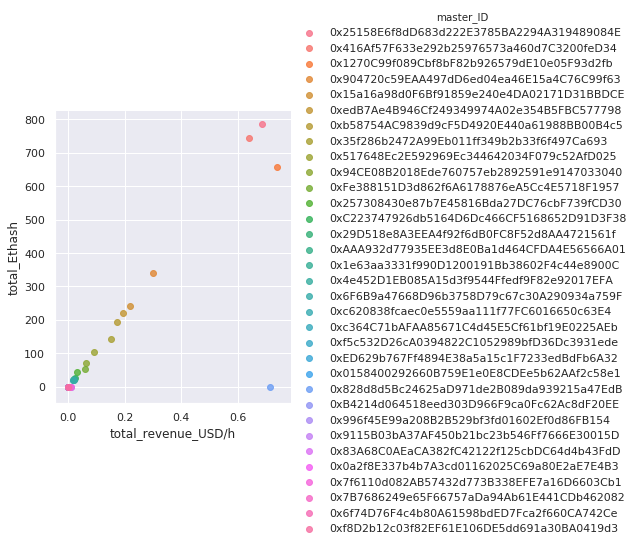

In [463]:
sns.lmplot( y="total_Ethash", x="total_revenue_USD/h", data=df23, fit_reg=False, hue='master_ID', legend=True)

In [464]:
df23[['master_ID','total_Ethash','count','revenue_USD/d']]

,master_ID,total_Ethash,count,revenue_USD/d
0,0x25158E6f8dD683d222E3785BA2294A319489084E,784.967,9.0,$16.48
1,0x416Af57F633e292b25976573a460d7C3200feD34,745.258,11.0,$15.40
2,0x1270C99f089Cbf8bF82b926579dE10e05F93d2fb,657.782,4.0,$17.74
3,0x904720c59EAA497dD6ed04ea46E15a4C76C99f63,340.018,4.0,$7.16
4,0x15a16a98d0F6Bf91859e240e4DA02171D31BBDCE,240.009,2.0,$5.20
5,0xedB7Ae4B946Cf249349974A02e354B5FBC577798,219.579,3.0,$4.63
6,0xb58754AC9839d9cF5D4920E440a61988BB00B4c5,194.433,4.0,$4.12
7,0x35f286b2472A99Eb011ff349b2b33f6f497Ca693,141.723,2.0,$3.67
8,0x517648Ec2E592969Ec344642034F079c52AfD025,102.477,11.0,$2.17
9,0x94CE08B2018Ede760757eb2892591e9147033040,72.155,6.0,$1.52


# Run the same statistics for consumers

In [465]:
df.groupby('consumer_ID').describe()['Ethash']

,count,mean,std,min,25%,50%,75%,max
consumer_ID,,,,,,,,
0x1270C99f089Cbf8bF82b926579dE10e05F93d2fb,4.0,91.277250,94.950587,0.000,16.93200,84.6795,159.02475,195.750
0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb,11.0,152.241909,79.228359,0.000,147.70150,186.2830,190.37850,240.009
0x35f286b2472A99Eb011ff349b2b33f6f497Ca693,2.0,70.861500,8.300727,64.992,67.92675,70.8615,73.79625,76.731
0x417c92FbD944b125A578848DE44a4FD9132E0911,12.0,34.862833,17.700825,19.778,20.74775,25.2610,44.76325,72.155
0x49f6C95B97C209F814c5b3B13428E91686a1FEd9,2.0,0.000000,0.000000,0.000,0.00000,0.0000,0.00000,0.000
0x4C5BAf6Fa57AA4b37DB3dAcd5eAf5A220Db638c7,55.0,0.000000,0.000000,0.000,0.00000,0.0000,0.00000,0.000
0x5D2c0CF8ec8C2d10Cda338f2d59893B433D276a5,7.0,161.563571,81.674660,53.305,121.27600,147.0940,197.66050,292.673
0x83A68C0AEaCA382fC42122f125cbDC64d4b43FdD,2.0,0.000000,0.000000,0.000,0.00000,0.0000,0.00000,0.000
0xB4214d064518eed303D966F9ca0Fc62Ac8dF20EE,1.0,0.000000,NaN,0.000,0.00000,0.0000,0.00000,0.000


In [466]:
df10 = df.groupby('consumer_ID').describe()['Ethash']

In [467]:
df10.to_csv('consumer.csv')

In [468]:
df11 = pd.read_csv('consumer.csv')

In [469]:
df11['total_Ethash']= df11['mean']*df11['count']

In [470]:
df11

,consumer_ID,count,mean,std,min,25%,50%,75%,max,total_Ethash
0,0x1270C99f089Cbf8bF82b926579dE10e05F93d2fb,4.0,91.277250,94.950587,0.000,16.93200,84.6795,159.02475,195.750,365.109
1,0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb,11.0,152.241909,79.228359,0.000,147.70150,186.2830,190.37850,240.009,1674.661
2,0x35f286b2472A99Eb011ff349b2b33f6f497Ca693,2.0,70.861500,8.300727,64.992,67.92675,70.8615,73.79625,76.731,141.723
3,0x417c92FbD944b125A578848DE44a4FD9132E0911,12.0,34.862833,17.700825,19.778,20.74775,25.2610,44.76325,72.155,418.354
4,0x49f6C95B97C209F814c5b3B13428E91686a1FEd9,2.0,0.000000,0.000000,0.000,0.00000,0.0000,0.00000,0.000,0.000
5,0x4C5BAf6Fa57AA4b37DB3dAcd5eAf5A220Db638c7,55.0,0.000000,0.000000,0.000,0.00000,0.0000,0.00000,0.000,0.000
6,0x5D2c0CF8ec8C2d10Cda338f2d59893B433D276a5,7.0,161.563571,81.674660,53.305,121.27600,147.0940,197.66050,292.673,1130.945
7,0x83A68C0AEaCA382fC42122f125cbDC64d4b43FdD,2.0,0.000000,0.000000,0.000,0.00000,0.0000,0.00000,0.000,0.000
8,0xB4214d064518eed303D966F9ca0Fc62Ac8dF20EE,1.0,0.000000,NaN,0.000,0.00000,0.0000,0.00000,0.000,0.000
9,0xD797292d9983a2327CCDe642FEcD411f85cCBbCa,1.0,0.000000,NaN,0.000,0.00000,0.0000,0.00000,0.000,0.000


In [471]:
def total_expense(address):
    return df[df.consumer_ID == address]['price_USD/h'].sum()

In [472]:
df11['total_expense_USD/h'] = df11['consumer_ID'].apply(total_expense)

In [473]:
df11['total_expense_USD/d'] = df11['total_expense_USD/h'] *24

In [474]:
df11['expense_USD/d'] = df11['total_expense_USD/d'].map('${:,.2f}'.format)

In [475]:
df11.head()

,consumer_ID,count,mean,std,min,25%,50%,75%,max,total_Ethash,total_expense_USD/h,total_expense_USD/d,expense_USD/d
0,0x1270C99f089Cbf8bF82b926579dE10e05F93d2fb,4.0,91.277250,94.950587,0.000,16.93200,84.6795,159.02475,195.750,365.109,0.834058,20.017401,$20.02
1,0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb,11.0,152.241909,79.228359,0.000,147.70150,186.2830,190.37850,240.009,1674.661,1.460432,35.050365,$35.05
2,0x35f286b2472A99Eb011ff349b2b33f6f497Ca693,2.0,70.861500,8.300727,64.992,67.92675,70.8615,73.79625,76.731,141.723,0.153000,3.672000,$3.67
3,0x417c92FbD944b125A578848DE44a4FD9132E0911,12.0,34.862833,17.700825,19.778,20.74775,25.2610,44.76325,72.155,418.354,0.331940,7.966555,$7.97
4,0x49f6C95B97C209F814c5b3B13428E91686a1FEd9,2.0,0.000000,0.000000,0.000,0.00000,0.0000,0.00000,0.000,0.000,0.000000,0.000000,$0.00


In [476]:
df11.sort_values(['total_Ethash','count'], ascending = False)

,consumer_ID,count,mean,std,min,25%,50%,75%,max,total_Ethash,total_expense_USD/h,total_expense_USD/d,expense_USD/d
1,0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb,11.0,152.241909,79.228359,0.000,147.70150,186.2830,190.37850,240.009,1674.661,1.460432e+00,3.505036e+01,$35.05
6,0x5D2c0CF8ec8C2d10Cda338f2d59893B433D276a5,7.0,161.563571,81.674660,53.305,121.27600,147.0940,197.66050,292.673,1130.945,9.946048e-01,2.387051e+01,$23.87
3,0x417c92FbD944b125A578848DE44a4FD9132E0911,12.0,34.862833,17.700825,19.778,20.74775,25.2610,44.76325,72.155,418.354,3.319398e-01,7.966555e+00,$7.97
0,0x1270C99f089Cbf8bF82b926579dE10e05F93d2fb,4.0,91.277250,94.950587,0.000,16.93200,84.6795,159.02475,195.750,365.109,8.340584e-01,2.001740e+01,$20.02
2,0x35f286b2472A99Eb011ff349b2b33f6f497Ca693,2.0,70.861500,8.300727,64.992,67.92675,70.8615,73.79625,76.731,141.723,1.530000e-01,3.672000e+00,$3.67
5,0x4C5BAf6Fa57AA4b37DB3dAcd5eAf5A220Db638c7,55.0,0.000000,0.000000,0.000,0.00000,0.0000,0.00000,0.000,0.000,5.441694e-02,1.306007e+00,$1.31
4,0x49f6C95B97C209F814c5b3B13428E91686a1FEd9,2.0,0.000000,0.000000,0.000,0.00000,0.0000,0.00000,0.000,0.000,0.000000e+00,0.000000e+00,$0.00
7,0x83A68C0AEaCA382fC42122f125cbDC64d4b43FdD,2.0,0.000000,0.000000,0.000,0.00000,0.0000,0.00000,0.000,0.000,6.220800e-10,1.492992e-08,$0.00
8,0xB4214d064518eed303D966F9ca0Fc62Ac8dF20EE,1.0,0.000000,NaN,0.000,0.00000,0.0000,0.00000,0.000,0.000,1.000000e-02,2.400000e-01,$0.24
9,0xD797292d9983a2327CCDe642FEcD411f85cCBbCa,1.0,0.000000,NaN,0.000,0.00000,0.0000,0.00000,0.000,0.000,3.534665e-01,8.483197e+00,$8.48


In [477]:
df11 = df11.sort_values(['total_Ethash','count'], ascending = False)

In [478]:
df11.head()

,consumer_ID,count,mean,std,min,25%,50%,75%,max,total_Ethash,total_expense_USD/h,total_expense_USD/d,expense_USD/d
1,0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb,11.0,152.241909,79.228359,0.000,147.70150,186.2830,190.37850,240.009,1674.661,1.460432,35.050365,$35.05
6,0x5D2c0CF8ec8C2d10Cda338f2d59893B433D276a5,7.0,161.563571,81.674660,53.305,121.27600,147.0940,197.66050,292.673,1130.945,0.994605,23.870515,$23.87
3,0x417c92FbD944b125A578848DE44a4FD9132E0911,12.0,34.862833,17.700825,19.778,20.74775,25.2610,44.76325,72.155,418.354,0.331940,7.966555,$7.97
0,0x1270C99f089Cbf8bF82b926579dE10e05F93d2fb,4.0,91.277250,94.950587,0.000,16.93200,84.6795,159.02475,195.750,365.109,0.834058,20.017401,$20.02
2,0x35f286b2472A99Eb011ff349b2b33f6f497Ca693,2.0,70.861500,8.300727,64.992,67.92675,70.8615,73.79625,76.731,141.723,0.153000,3.672000,$3.67


In [479]:
df11[['consumer_ID', 'total_Ethash', 'count','expense_USD/d']].sort_values(['total_Ethash','count'], ascending = False)

,consumer_ID,total_Ethash,count,expense_USD/d
1,0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb,1674.661,11.0,$35.05
6,0x5D2c0CF8ec8C2d10Cda338f2d59893B433D276a5,1130.945,7.0,$23.87
3,0x417c92FbD944b125A578848DE44a4FD9132E0911,418.354,12.0,$7.97
0,0x1270C99f089Cbf8bF82b926579dE10e05F93d2fb,365.109,4.0,$20.02
2,0x35f286b2472A99Eb011ff349b2b33f6f497Ca693,141.723,2.0,$3.67
5,0x4C5BAf6Fa57AA4b37DB3dAcd5eAf5A220Db638c7,0.000,55.0,$1.31
4,0x49f6C95B97C209F814c5b3B13428E91686a1FEd9,0.000,2.0,$0.00
7,0x83A68C0AEaCA382fC42122f125cbDC64d4b43FdD,0.000,2.0,$0.00
8,0xB4214d064518eed303D966F9ca0Fc62Ac8dF20EE,0.000,1.0,$0.24
9,0xD797292d9983a2327CCDe642FEcD411f85cCBbCa,0.000,1.0,$8.48


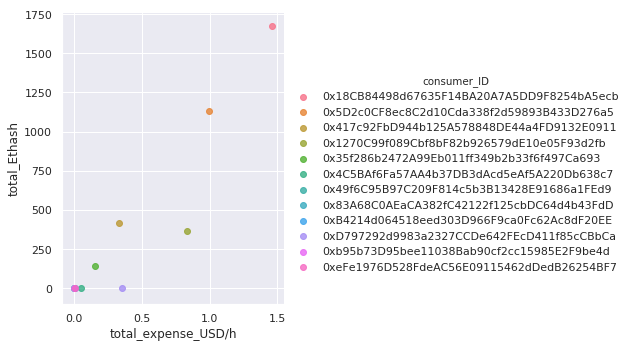

In [480]:
sns.lmplot( y="total_Ethash", x="total_expense_USD/h", data=df11, fit_reg=False, hue='consumer_ID', legend=True)

# Connor's deals

In [481]:
df[df.consumer_ID == '0x417c92FbD944b125A578848DE44a4FD9132E0911']

,0,1,2,3,4,5,6,7,8,9,...,29,30,31,consumer_ID,supplier_ID,price_USD/h,Ethash,master_ID,benchmark,deal_ID
5,"{""deal"":{""id"":""15390""","""benchmarks"":{""values"":[506",1070,2,512000000,67108864,1000000,1000000,2,4292050944,...,"""supplierCertificates"":""W10=""}",None,None,0x417c92FbD944b125A578848DE44a4FD9132E0911,0xf6db5268Dc72DfDC2a21AC9895d64f1461F192C4,0.016485,21.019,0x1e63aa3331f990D1200191Bb38602F4c44e8900C,506,15390
9,"{""deal"":{""id"":""15306""","""benchmarks"":{""values"":[501",1079,2,512000000,67108864,1000000,1000000,2,4232052736,...,"""supplierCertificates"":""W10=""}",None,None,0x417c92FbD944b125A578848DE44a4FD9132E0911,0x730F19B7FA079EBfDc7360066ec593e4Bdd46Bf2,0.018625,23.887,0x29D518e8A3EEA4f92f6dB0FC8F52d8AA4721561f,501,15306
14,"{""deal"":{""id"":""15383""","""benchmarks"":{""values"":[510",2111,32,512000000,67108864,1000000,1000000,2,12786335744,...,None,None,None,0x417c92FbD944b125A578848DE44a4FD9132E0911,0xdEa8d435E978e73F8C1e4850a871BfE8E995Ded0,0.057518,72.155,0x94CE08B2018Ede760757eb2892591e9147033040,510,15383
17,"{""deal"":{""id"":""14311""","""benchmarks"":{""values"":[508",1846,12,512000000,67108864,1000000,1000000,2,6372196352,...,"""supplierCertificates"":""W10=""}",None,None,0x417c92FbD944b125A578848DE44a4FD9132E0911,0x0E953f4fBdb806B47DC9a9a2546a22eA967Fe8a1,0.036532,44.702,0xb58754AC9839d9cF5D4920E440a61988BB00B4c5,508,14311
26,"{""deal"":{""id"":""15292""","""benchmarks"":{""values"":[506",1113,8,512000000,67108864,1000000,1000000,1,6368002048,...,None,None,None,0x417c92FbD944b125A578848DE44a4FD9132E0911,0x734C2a165e57496169aAAEA6E22aE763fF8d7654,0.015417,19.778,0x6F6B9a47668D96b3758D79c67c30A290934a759F,506,15292
29,"{""deal"":{""id"":""13919""","""benchmarks"":{""values"":[501",1102,2,512000000,67108864,1000000,1000000,1,3165650944,...,None,None,None,0x417c92FbD944b125A578848DE44a4FD9132E0911,0x26200241593722FA17DE5722Ed66d8830dc58C6D,0.016143,19.934,0xedB7Ae4B946Cf249349974A02e354B5FBC577798,501,13919
31,"{""deal"":{""id"":""14292""","""benchmarks"":{""values"":[508",998,2,512000000,67108864,1000001,1000000,2,4285816832,...,"""supplierCertificates"":""W10=""}",None,None,0x417c92FbD944b125A578848DE44a4FD9132E0911,0x4023A8e997C09f97DA89aaB99AC7C5A93A9d1c49,0.032231,44.947,0x257308430e87b7E45816Bda27DC76cbF739fCD30,508,14292
49,"{""deal"":{""id"":""15230""","""benchmarks"":{""values"":[512",1507,4,512000000,67108864,1000001,1000000,2,8513388544,...,None,None,None,0x417c92FbD944b125A578848DE44a4FD9132E0911,0x491028A2510F1f9f10650272f780f2da1302bd73,0.047863,59.101,0x517648Ec2E592969Ec344642034F079c52AfD025,512,15230
53,"{""deal"":{""id"":""15250""","""benchmarks"":{""values"":[506",1526,8,512000000,67108864,1000000,1000000,2,4292050944,...,None,None,None,0x417c92FbD944b125A578848DE44a4FD9132E0911,0x2DeBd108c1561905C89c4707891a6612c50402c8,0.035004,43.376,0x517648Ec2E592969Ec344642034F079c52AfD025,506,15250
61,"{""deal"":{""id"":""15226""","""benchmarks"":{""values"":[510",1223,4,512000000,67108864,1000000,1000000,1,8513388544,...,None,None,None,0x417c92FbD944b125A578848DE44a4FD9132E0911,0x6964A09BC043AE79567B8965209733958e18dEAe,0.021498,26.635,0xC223747926db5164D6Dc466CF5168652D91D3F38,510,15226


In [482]:
df12 = df[df.consumer_ID == '0x417c92FbD944b125A578848DE44a4FD9132E0911']

In [483]:
df12 = df12.sort_values(['Ethash', 'price_USD/h'], ascending = False)

In [484]:
df12[['consumer_ID', 'supplier_ID', 'master_ID', 'price_USD/h', 'Ethash',0]]

,consumer_ID,supplier_ID,master_ID,price_USD/h,Ethash,0
14,0x417c92FbD944b125A578848DE44a4FD9132E0911,0xdEa8d435E978e73F8C1e4850a871BfE8E995Ded0,0x94CE08B2018Ede760757eb2892591e9147033040,0.057518,72.155,"{""deal"":{""id"":""15383"""
49,0x417c92FbD944b125A578848DE44a4FD9132E0911,0x491028A2510F1f9f10650272f780f2da1302bd73,0x517648Ec2E592969Ec344642034F079c52AfD025,0.047863,59.101,"{""deal"":{""id"":""15230"""
31,0x417c92FbD944b125A578848DE44a4FD9132E0911,0x4023A8e997C09f97DA89aaB99AC7C5A93A9d1c49,0x257308430e87b7E45816Bda27DC76cbF739fCD30,0.032231,44.947,"{""deal"":{""id"":""14292"""
17,0x417c92FbD944b125A578848DE44a4FD9132E0911,0x0E953f4fBdb806B47DC9a9a2546a22eA967Fe8a1,0xb58754AC9839d9cF5D4920E440a61988BB00B4c5,0.036532,44.702,"{""deal"":{""id"":""14311"""
53,0x417c92FbD944b125A578848DE44a4FD9132E0911,0x2DeBd108c1561905C89c4707891a6612c50402c8,0x517648Ec2E592969Ec344642034F079c52AfD025,0.035004,43.376,"{""deal"":{""id"":""15250"""
61,0x417c92FbD944b125A578848DE44a4FD9132E0911,0x6964A09BC043AE79567B8965209733958e18dEAe,0xC223747926db5164D6Dc466CF5168652D91D3F38,0.021498,26.635,"{""deal"":{""id"":""15226"""
9,0x417c92FbD944b125A578848DE44a4FD9132E0911,0x730F19B7FA079EBfDc7360066ec593e4Bdd46Bf2,0x29D518e8A3EEA4f92f6dB0FC8F52d8AA4721561f,0.018625,23.887,"{""deal"":{""id"":""15306"""
63,0x417c92FbD944b125A578848DE44a4FD9132E0911,0x1E575FB7dD8b28CEcAD9065A7aFD1aC6c2fBA797,0xAAA932d77935EE3d8E0Ba1d464CFDA4E56566A01,0.018804,23.014,"{""deal"":{""id"":""15222"""
5,0x417c92FbD944b125A578848DE44a4FD9132E0911,0xf6db5268Dc72DfDC2a21AC9895d64f1461F192C4,0x1e63aa3331f990D1200191Bb38602F4c44e8900C,0.016485,21.019,"{""deal"":{""id"":""15390"""
29,0x417c92FbD944b125A578848DE44a4FD9132E0911,0x26200241593722FA17DE5722Ed66d8830dc58C6D,0xedB7Ae4B946Cf249349974A02e354B5FBC577798,0.016143,19.934,"{""deal"":{""id"":""13919"""


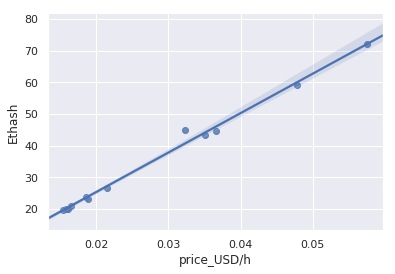

In [485]:
sns.regplot( y="Ethash", x="price_USD/h", data=df12)

In [486]:
from scipy import stats

In [487]:
slope, intercept, r_value, p_value, std_err = stats.linregress(df12.Ethash,df12['price_USD/h'])

In [488]:
slope

0.00079601651412325284

In [489]:
print("Current profitability (USD/h) = " + str(slope) + " * Ethash(Mh/s)")

Current profitability (USD/h) = 0.000796016514123 * Ethash(Mh/s)


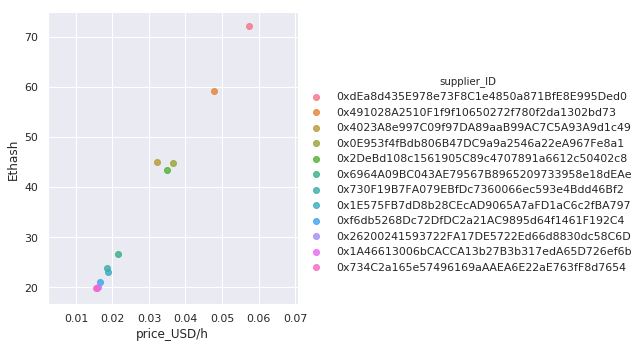

In [490]:
sns.lmplot( y="Ethash", x="price_USD/h", data=df12, fit_reg=False, hue='supplier_ID', legend=True)

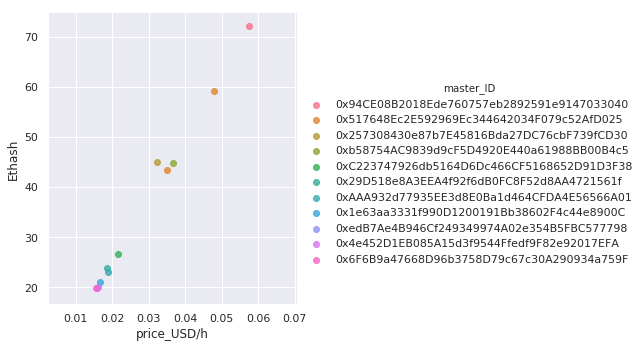

In [491]:
sns.lmplot( y="Ethash", x="price_USD/h", data=df12, fit_reg=False, hue='master_ID', legend=True)

In [492]:
0.194853 * 1.05

0.20459565000000002

# Conclusions

In [493]:
print('Real-time total Ethash rate of the entire SONM platform is '+ str(df13['total_Ethash'].sum()) +' Mh/s.')

print('At this moment, total ' + str("{:.2f}".format(df13['total_revenue_USD/d'].sum())) + ' USD/day are spent on the entire SONM platform.')

print('GPU-Connor currently has '+ str(len(df12)) + ' deals.')

print('GPU-Connor currently pays ' + str("{:.2f}".format(df12['price_USD/h'].sum()*24)) + " USD/day.") 

print('GPU-Connor currently mines ETH with ' + str(df12['Ethash'].sum()) + ' Mh/s hashrate.')

print('There are '+ str(len(df23))+ ' unique suppliers at this moment.')

print('There are ' + str(len(df23[df23['total_Ethash']>0])) + ' unique GPU sppliers at this moment.')

print('There are ' + str(len(df23)-len(df23[df23['total_Ethash']>0])) + ' unique CPU sppliers at this moment.')

print('There are '+ str(len(df11))+ ' unique consumers at this moment.')

print('Currenlty, there are total '+ str(len(df)) + ' deals.')

print('Of which ' + str(len(df[df.Ethash>0])) + ' deals contain GPU.')

print('And ' + str(len(df[df.Ethash==0])) + ' deals are CPU only.')


Real-time total Ethash rate of the entire SONM platform is 3730.792 Mh/s.
At this moment, total 100.85 USD/day are spent on the entire SONM platform.
GPU-Connor currently has 12 deals.
GPU-Connor currently pays 7.97 USD/day.
GPU-Connor currently mines ETH with 418.354 Mh/s hashrate.
There are 33 unique suppliers at this moment.
There are 18 unique GPU sppliers at this moment.
There are 15 unique CPU sppliers at this moment.
There are 12 unique consumers at this moment.
Currenlty, there are total 99 deals.
Of which 33 deals contain GPU.
And 66 deals are CPU only.


# profitablility calculator

GPU card  EThash  SONM profitability
Nvida GTX 1050 TI   15 Mh/s  0.0127 USD/h 
Nvida GTX 1060    24 Mh/s  0.0201 USD/h
Nvida GTX 1070 TI   32 Mh/s  0.0274 USD/h
Nvida GTX 1080    27 Mh/s  0.0231 USD/h
Nvida GTX 1080 TI   37 Mh/s  0.0317 USD/h
Nvida GTX TITAN   40 Mh/s  0.0343 USD/h
Nvida GTX 1080 (with Pill) 40Mh/s 0.0343 USD/h
Nvida GTX 1080 TI (with Pill) 50 Mh/s 0.0429 USD/h

In [494]:
print("Current profitability (USD/h) = " + str(slope) + " * Ethash(Mh/s)")
print(" ")
print("GPU card                EThash     SONM profitability")
print("Nvida GTX 1050 TI       15 Mh/s    " + str("{:.2f}".format(slope*15*24))+ " USD/day")
print("Nvida GTX 1060          24 Mh/s    " + str("{:.2f}".format(slope*24*24))+ " USD/day")
print("Nvida GTX 1070 TI       32 Mh/s    " + str("{:.2f}".format(slope*32*24))+ " USD/day")
print("Nvida GTX 1080          27 Mh/s    " + str("{:.2f}".format(slope*27*24))+ " USD/day")
print("Nvida GTX 1080 TI       37 Mh/s    " + str("{:.2f}".format(slope*37*24))+ " USD/day")
print("Nvida GTX TITAN         40 Mh/s    " + str("{:.2f}".format(slope*40*24))+ " USD/day")
print("Nvida GTX 1080 +pill    40 Mh/s    " + str("{:.2f}".format(slope*40*24))+ " USD/day")
print("Nvida GTX 1080 TI +pill 50 Mh/s    " + str("{:.2f}".format(slope*50*24))+ " USD/day")






Current profitability (USD/h) = 0.000796016514123 * Ethash(Mh/s)
 
GPU card                EThash     SONM profitability
Nvida GTX 1050 TI       15 Mh/s    0.29 USD/day
Nvida GTX 1060          24 Mh/s    0.46 USD/day
Nvida GTX 1070 TI       32 Mh/s    0.61 USD/day
Nvida GTX 1080          27 Mh/s    0.52 USD/day
Nvida GTX 1080 TI       37 Mh/s    0.71 USD/day
Nvida GTX TITAN         40 Mh/s    0.76 USD/day
Nvida GTX 1080 +pill    40 Mh/s    0.76 USD/day
Nvida GTX 1080 TI +pill 50 Mh/s    0.96 USD/day


# CPU connor

In [495]:
def benchmark(content):
    return int(content[content.find('[')+1:])

In [496]:
df['benchmark'] = df[1].apply(benchmark)

In [497]:
df[df.consumer_ID == '0x4C5BAf6Fa57AA4b37DB3dAcd5eAf5A220Db638c7']

,0,1,2,3,4,5,6,7,8,9,...,29,30,31,consumer_ID,supplier_ID,price_USD/h,Ethash,master_ID,benchmark,deal_ID
0,"{""deals"":[{""deal"":{""id"":""15392""","""benchmarks"":{""values"":[2169",2111,32,64000000,150000000,1000000,1000000,0,0,...,"""consumerCertificates"":""W10=""}",None,None,0x4C5BAf6Fa57AA4b37DB3dAcd5eAf5A220Db638c7,0xdEa8d435E978e73F8C1e4850a871BfE8E995Ded0,0.000206,0.0,0x94CE08B2018Ede760757eb2892591e9147033040,2169,15392
1,"{""deal"":{""id"":""15391""","""benchmarks"":{""values"":[2169",2111,32,64000000,150000000,1000000,1000000,0,0,...,"""consumerCertificates"":""W10=""}",None,None,0x4C5BAf6Fa57AA4b37DB3dAcd5eAf5A220Db638c7,0xdEa8d435E978e73F8C1e4850a871BfE8E995Ded0,0.000206,0.0,0x94CE08B2018Ede760757eb2892591e9147033040,2169,15391
2,"{""deal"":{""id"":""15358""","""benchmarks"":{""values"":[10365",1846,12,64000000,150000000,1000000,1000000,0,0,...,"""supplierCertificates"":""W10=""","""consumerCertificates"":""W10=""}",None,0x4C5BAf6Fa57AA4b37DB3dAcd5eAf5A220Db638c7,0x0E953f4fBdb806B47DC9a9a2546a22eA967Fe8a1,0.007166,0.0,0xb58754AC9839d9cF5D4920E440a61988BB00B4c5,10365,15358
3,"{""deal"":{""id"":""15357""","""benchmarks"":{""values"":[2318",1507,4,64000000,150000000,1000001,1000000,0,0,...,"""consumerCertificates"":""W10=""}",None,None,0x4C5BAf6Fa57AA4b37DB3dAcd5eAf5A220Db638c7,0x491028A2510F1f9f10650272f780f2da1302bd73,0.001053,0.0,0x517648Ec2E592969Ec344642034F079c52AfD025,2318,15357
4,"{""deal"":{""id"":""15356""","""benchmarks"":{""values"":[1260",1077,2,64000000,150000000,1000000,1000000,0,0,...,"""supplierCertificates"":""W10=""","""consumerCertificates"":""W10=""}",None,0x4C5BAf6Fa57AA4b37DB3dAcd5eAf5A220Db638c7,0xF99B6FeCB09521A0770de019DDCa4a82362Aca78,0.000417,0.0,0x0158400292660B759E1e0E8CDEe5b62AAf2c58e1,1260,15356
8,"{""deal"":{""id"":""15264""","""benchmarks"":{""values"":[512",1507,4,64000000,150000000,1000001,1000000,0,0,...,"""consumerCertificates"":""W10=""}",None,None,0x4C5BAf6Fa57AA4b37DB3dAcd5eAf5A220Db638c7,0x491028A2510F1f9f10650272f780f2da1302bd73,0.000222,0.0,0x517648Ec2E592969Ec344642034F079c52AfD025,512,15264
10,"{""deal"":{""id"":""15386""","""benchmarks"":{""values"":[2169",2111,32,64000000,150000000,1000000,1000000,0,0,...,"""consumerCertificates"":""W10=""}",None,None,0x4C5BAf6Fa57AA4b37DB3dAcd5eAf5A220Db638c7,0xdEa8d435E978e73F8C1e4850a871BfE8E995Ded0,0.000204,0.0,0x94CE08B2018Ede760757eb2892591e9147033040,2169,15386
11,"{""deal"":{""id"":""15384""","""benchmarks"":{""values"":[2169",2111,32,64000000,150000000,1000000,1000000,0,0,...,"""consumerCertificates"":""W10=""}",None,None,0x4C5BAf6Fa57AA4b37DB3dAcd5eAf5A220Db638c7,0xdEa8d435E978e73F8C1e4850a871BfE8E995Ded0,0.000204,0.0,0x94CE08B2018Ede760757eb2892591e9147033040,2169,15384
13,"{""deal"":{""id"":""15301""","""benchmarks"":{""values"":[1394",1507,4,64000000,150000000,1000001,1000000,0,0,...,"""consumerCertificates"":""W10=""}",None,None,0x4C5BAf6Fa57AA4b37DB3dAcd5eAf5A220Db638c7,0x491028A2510F1f9f10650272f780f2da1302bd73,0.000638,0.0,0x517648Ec2E592969Ec344642034F079c52AfD025,1394,15301
15,"{""deal"":{""id"":""15355""","""benchmarks"":{""values"":[17658",985,28,64000000,150000000,1000002,1000000,0,0,...,"""supplierCertificates"":""W10=""","""consumerCertificates"":""W10=""}",None,0x4C5BAf6Fa57AA4b37DB3dAcd5eAf5A220Db638c7,0x39A0d12A26F6B79D7c1DcE36c15081fc14C08196,0.001264,0.0,0x7f6110d082AB57432d773B338EFE7a16D6603Cb1,17658,15355


In [498]:
df_cpu = df[df.consumer_ID == '0x4C5BAf6Fa57AA4b37DB3dAcd5eAf5A220Db638c7']

In [499]:
df_cpu['price_USD/h'].sum()*24

1.3060066556210685

In [500]:
len(df_cpu)

55

In [501]:
df_cpu['cpu'] = df_cpu[3].astype(int)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [502]:
df_cpu['total_cpu_power'] = df_cpu['cpu']*df_cpu['benchmark']

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [503]:
df_cpu['cpu_multi']=df_cpu[2].astype(int)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


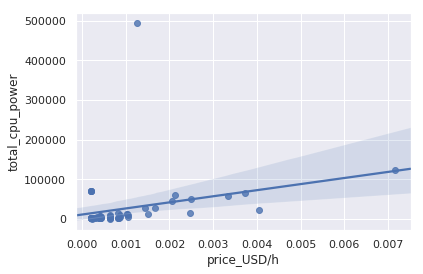

In [504]:
sns.regplot( y="total_cpu_power", x="price_USD/h", data=df_cpu)

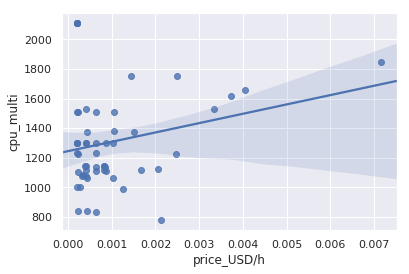

In [505]:
sns.regplot( y="cpu_multi", x="price_USD/h", data=df_cpu)

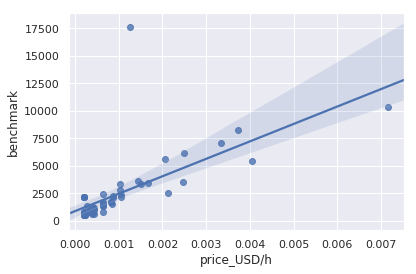

In [506]:
sns.regplot( y="benchmark", x="price_USD/h", data=df_cpu)

In [507]:
print('Real-time total Ethash rate of the entire SONM platform is '+ str(df13['total_Ethash'].sum()) +' Mh/s.')

print('At this moment, total ' + str("{:.2f}".format(df13['total_revenue_USD/d'].sum())) + ' USD/day are spent on the entire SONM platform.')

print('GPU-Connor currently has '+ str(len(df12)) + ' deals.')

print('GPU-Connor currently pays ' + str("{:.2f}".format(df12['price_USD/h'].sum()*24)) + " USD/day.") 

print('GPU-Connor currently mines ETH with ' + str(df12['Ethash'].sum()) + ' Mh/s hashrate.')

print('There are '+ str(len(df23))+ ' unique suppliers at this moment.')

print('There are ' + str(len(df23[df23['total_Ethash']>0])) + ' unique GPU sppliers at this moment.')

print('There are ' + str(len(df23)-len(df23[df23['total_Ethash']>0])) + ' unique CPU sppliers at this moment.')

print('There are '+ str(len(df11))+ ' unique consumers at this moment.')

print('Currenlty, there are total '+ str(len(df)) + ' deals.')

print('Of which ' + str(len(df[df.Ethash>0])) + ' deals contain GPU.')

print('And ' + str(len(df[df.Ethash==0])) + ' deals are CPU only.')


print('CPU-Connor currently has '+ str(len(df_cpu)) + ' deals.')

print('CPU-Connor currently pays ' + str("{:.2f}".format(df_cpu['price_USD/h'].sum()*24)) + " USD/day.") 


Real-time total Ethash rate of the entire SONM platform is 3730.792 Mh/s.
At this moment, total 100.85 USD/day are spent on the entire SONM platform.
GPU-Connor currently has 12 deals.
GPU-Connor currently pays 7.97 USD/day.
GPU-Connor currently mines ETH with 418.354 Mh/s hashrate.
There are 33 unique suppliers at this moment.
There are 18 unique GPU sppliers at this moment.
There are 15 unique CPU sppliers at this moment.
There are 12 unique consumers at this moment.
Currenlty, there are total 99 deals.
Of which 33 deals contain GPU.
And 66 deals are CPU only.
CPU-Connor currently has 55 deals.
CPU-Connor currently pays 1.31 USD/day.


# My deals

0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb

In [508]:
df[df.consumer_ID == '0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb']

,0,1,2,3,4,5,6,7,8,9,...,29,30,31,consumer_ID,supplier_ID,price_USD/h,Ethash,master_ID,benchmark,deal_ID
7,"{""deal"":{""id"":""2040""","""benchmarks"":{""values"":[824",788,1,800000000,10000000000,500000000,300000000,0,0,...,"""supplierCertificates"":""W10=""}",None,None,0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb,0xaE7DB91DeC00E3Be062C7dC33288597DF023e0d6,0.000480,0.000,0xf5c532D26cA0394822C1052989bfD36Dc3931ede,824,2040
21,"{""deal"":{""id"":""15327""","""benchmarks"":{""values"":[519",1136,2,512000000,67108864,1000000,1000000,8,8513388544,...,None,None,None,0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb,0x0b6EB1366be92128Fc2386E9ABeCdE0E76314E96,0.169444,194.346,0x904720c59EAA497dD6ed04ea46E15a4C76C99f63,519,15327
22,"{""deal"":{""id"":""12850""","""benchmarks"":{""values"":[517",1145,2,512000000,67108864,1000000,1000000,7,4238344192,...,"""supplierCertificates"":""W10=""}",None,None,0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb,0x1a5d1841078be8d8f2b54D4F3264438a69e94C94,0.216000,240.009,0x15a16a98d0F6Bf91859e240e4DA02171D31BBDCE,517,12850
23,"{""deal"":{""id"":""12657""","""benchmarks"":{""values"":[6045",2111,32,64000000,67108864,1000000,1000000,0,0,...,None,None,None,0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb,0xdEa8d435E978e73F8C1e4850a871BfE8E995Ded0,0.004824,0.000,0x94CE08B2018Ede760757eb2892591e9147033040,6045,12657
24,"{""deal"":{""id"":""13074""","""benchmarks"":{""values"":[511",1102,2,512000000,67108864,1000000,1000000,9,3163553792,...,None,None,None,0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb,0x26200241593722FA17DE5722Ed66d8830dc58C6D,0.176343,199.645,0xedB7Ae4B946Cf249349974A02e354B5FBC577798,511,13074
40,"{""deal"":{""id"":""15322""","""benchmarks"":{""values"":[521",1302,2,512000000,67108864,1000000,1000000,7,8513388544,...,None,None,None,0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb,0x62F5A3B4E867a9AB981201EbFA9A6FEA8dc22007,0.160431,186.198,0x416Af57F633e292b25976573a460d7C3200feD34,521,15322
43,"{""deal"":{""id"":""15319""","""benchmarks"":{""values"":[524",1300,2,512000000,67108864,1000000,1000001,7,8511291392,...,None,None,None,0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb,0xd8B606a3D19C53E6Eea84ca5738D7D7d2c0eeb5f,0.157383,186.283,0x416Af57F633e292b25976573a460d7C3200feD34,524,15319
44,"{""deal"":{""id"":""15317""","""benchmarks"":{""values"":[521",1300,2,512000000,67108864,1000000,1000000,7,8513388544,...,None,None,None,0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb,0x672Ee945a55327328472B1a02437293945157f4C,0.158666,186.411,0x416Af57F633e292b25976573a460d7C3200feD34,521,15317
56,"{""deal"":{""id"":""13326""","""benchmarks"":{""values"":[518",999,2,512000000,67108864,1000001,1000000,6,3556450304,...,"""supplierCertificates"":""W10=""}",None,None,0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb,0x82bADE452F2B117c213908050026277f6AC41E90,0.127545,149.731,0xb58754AC9839d9cF5D4920E440a61988BB00B4c5,518,13326
80,"{""deal"":{""id"":""14033""","""benchmarks"":{""values"":[516",1301,2,512000000,67108864,1000000,1000000,7,8513388544,...,None,None,None,0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb,0x10B3Fe7B225b9fF0294CAa76d5d9F8514Cd3d7B9,0.162020,186.366,0x416Af57F633e292b25976573a460d7C3200feD34,516,14033


In [509]:
df32 = df[df.consumer_ID == '0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb']

In [510]:
df32 = df32.sort_values(['Ethash', 'price_USD/h'], ascending = False)

In [511]:
df32[['consumer_ID', 'supplier_ID', 'master_ID', 'price_USD/h', 'Ethash',0]]

,consumer_ID,supplier_ID,master_ID,price_USD/h,Ethash,0
22,0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb,0x1a5d1841078be8d8f2b54D4F3264438a69e94C94,0x15a16a98d0F6Bf91859e240e4DA02171D31BBDCE,0.216000,240.009,"{""deal"":{""id"":""12850"""
24,0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb,0x26200241593722FA17DE5722Ed66d8830dc58C6D,0xedB7Ae4B946Cf249349974A02e354B5FBC577798,0.176343,199.645,"{""deal"":{""id"":""13074"""
21,0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb,0x0b6EB1366be92128Fc2386E9ABeCdE0E76314E96,0x904720c59EAA497dD6ed04ea46E15a4C76C99f63,0.169444,194.346,"{""deal"":{""id"":""15327"""
44,0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb,0x672Ee945a55327328472B1a02437293945157f4C,0x416Af57F633e292b25976573a460d7C3200feD34,0.158666,186.411,"{""deal"":{""id"":""15317"""
80,0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb,0x10B3Fe7B225b9fF0294CAa76d5d9F8514Cd3d7B9,0x416Af57F633e292b25976573a460d7C3200feD34,0.162020,186.366,"{""deal"":{""id"":""14033"""
43,0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb,0xd8B606a3D19C53E6Eea84ca5738D7D7d2c0eeb5f,0x416Af57F633e292b25976573a460d7C3200feD34,0.157383,186.283,"{""deal"":{""id"":""15319"""
40,0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb,0x62F5A3B4E867a9AB981201EbFA9A6FEA8dc22007,0x416Af57F633e292b25976573a460d7C3200feD34,0.160431,186.198,"{""deal"":{""id"":""15322"""
56,0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb,0x82bADE452F2B117c213908050026277f6AC41E90,0xb58754AC9839d9cF5D4920E440a61988BB00B4c5,0.127545,149.731,"{""deal"":{""id"":""13326"""
88,0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb,0x4f267C97692E4579Cb6BBF8a82Bd0B8aD7Ac84cB,0x904720c59EAA497dD6ed04ea46E15a4C76C99f63,0.127295,145.672,"{""deal"":{""id"":""14016"""
23,0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb,0xdEa8d435E978e73F8C1e4850a871BfE8E995Ded0,0x94CE08B2018Ede760757eb2892591e9147033040,0.004824,0.000,"{""deal"":{""id"":""12657"""


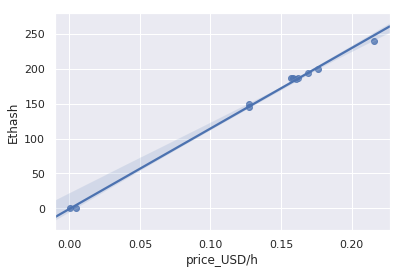

In [512]:
sns.regplot( y="Ethash", x="price_USD/h", data=df32)

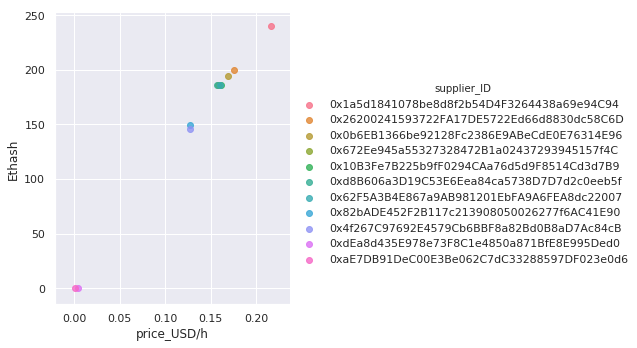

In [513]:
sns.lmplot( y="Ethash", x="price_USD/h", data=df32, fit_reg=False, hue='supplier_ID', legend=True)

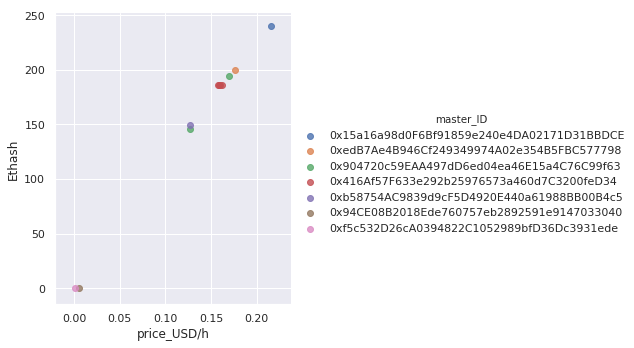

In [514]:
sns.lmplot( y="Ethash", x="price_USD/h", data=df32, fit_reg=False, hue='master_ID', legend=True)

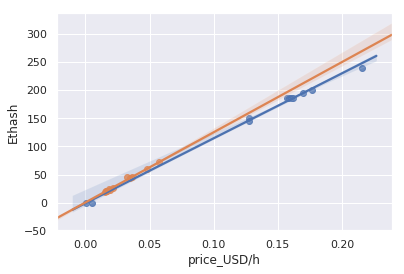

In [515]:
sns.regplot( y="Ethash", x="price_USD/h", data=df32)
sns.regplot( y="Ethash", x="price_USD/h", data=df12)

# 0x5D2c0CF8ec8C2d10Cda338f2d59893B433D276a5

In [516]:
df42 = df[df.consumer_ID == '0x5D2c0CF8ec8C2d10Cda338f2d59893B433D276a5']

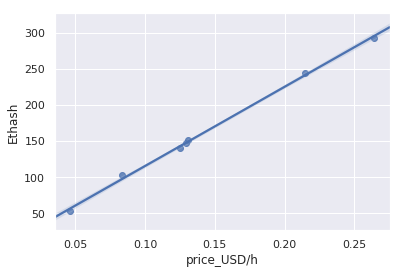

In [517]:
sns.regplot( y="Ethash", x="price_USD/h", data=df42)

In [518]:
df42 = df42.sort_values(['Ethash', 'price_USD/h'], ascending = False)

In [519]:
df42[['consumer_ID', 'supplier_ID', 'master_ID', 'price_USD/h', 'Ethash',0]]

,consumer_ID,supplier_ID,master_ID,price_USD/h,Ethash,0
6,0x5D2c0CF8ec8C2d10Cda338f2d59893B433D276a5,0xEd07629D8B32bdAdedfAB959236B684AbD3e81FC,0x1270C99f089Cbf8bF82b926579dE10e05F93d2fb,0.264048,292.673,"{""deal"":{""id"":""15266"""
60,0x5D2c0CF8ec8C2d10Cda338f2d59893B433D276a5,0x9C89fFA068b17a07D53dC97B0AA6A7069C69d966,0x25158E6f8dD683d222E3785BA2294A319489084E,0.214912,244.352,"{""deal"":{""id"":""15282"""
25,0x5D2c0CF8ec8C2d10Cda338f2d59893B433D276a5,0x7C576648CB2f36C4AC1f1345d5Bc56DdA41554b1,0x25158E6f8dD683d222E3785BA2294A319489084E,0.131052,150.969,"{""deal"":{""id"":""14806"""
45,0x5D2c0CF8ec8C2d10Cda338f2d59893B433D276a5,0x38d1Ba3BadE30B5d2B52E8b2A5DBdcAf9B743A84,0x25158E6f8dD683d222E3785BA2294A319489084E,0.129600,147.094,"{""deal"":{""id"":""14775"""
55,0x5D2c0CF8ec8C2d10Cda338f2d59893B433D276a5,0x35F09Ab27Eea605e2c76ed57Bc103b62F51AA572,0x25158E6f8dD683d222E3785BA2294A319489084E,0.124813,139.893,"{""deal"":{""id"":""15229"""
34,0x5D2c0CF8ec8C2d10Cda338f2d59893B433D276a5,0x6DEF7677086Ae013C30b010817b3Ff2C138e926d,0x25158E6f8dD683d222E3785BA2294A319489084E,0.083802,102.659,"{""deal"":{""id"":""15236"""
50,0x5D2c0CF8ec8C2d10Cda338f2d59893B433D276a5,0x3e55239FE9FABD62D6c9e83156ac0ae9C6240E49,0xFe388151D3d862f6A6178876eA5Cc4E5718F1957,0.046377,53.305,"{""deal"":{""id"":""15254"""


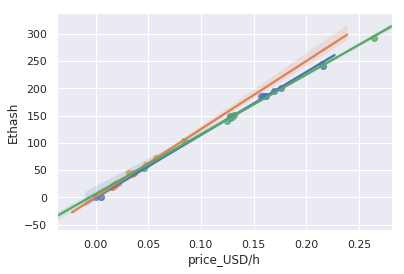

In [520]:
sns.regplot( y="Ethash", x="price_USD/h", data=df32)
sns.regplot( y="Ethash", x="price_USD/h", data=df12)
sns.regplot( y="Ethash", x="price_USD/h", data=df42)


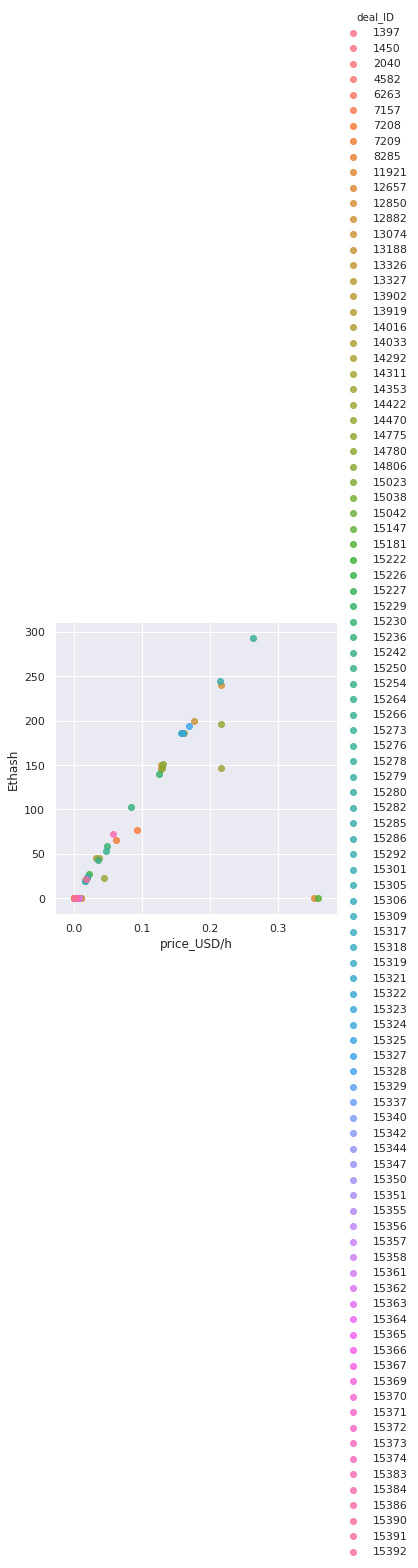

In [521]:
sns.lmplot( y="Ethash", x="price_USD/h", data=df, fit_reg=False, hue='deal_ID', legend=True)